In [1]:
# This is a sample Python script.
from datetime import datetime
import time

from src.pairs.pairs_strategy import TradingPair
import yfinance as yf

from src.pairs.coint_functions import *

from src.pairs.portfolio import Portfolio


from src.util.DataFetcher import *

import pandas as pd
import statsmodels.api as sm

/Users/georgelyons/PycharmProjects/CQF/PairsTrading/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# tickers = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT", "GS", "XOM", "META", "BRK-B", "MSFT", "QQQ"]
tickers = ["BTC-USD", "ETH-USD", "ADA-USD", "ETC-USD", "TRX-USD", "BCH-USD", "SOL-USD", "DOT-USD", "LTC-USD", "XRP-USD", "SPY", "QQQ"]

start_date = datetime(2018, 1, 1)
end_date = datetime(2024, 1, 27)
tickData = get_all_adjusted_close_data(start_date, end_date, tickers)
# tickData = tickData.dropna()

print(tickData.shape)
# Most Recent Data
tickData.head(50)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(2201, 12)


,BTC-USD,ETH-USD,ADA-USD,ETC-USD,TRX-USD,BCH-USD,SOL-USD,DOT-USD,LTC-USD,XRP-USD,SPY,QQQ
Date,,,,,,,,,,,,
2018-01-01,13657.200195,772.640991,0.728657,34.167900,0.051695,2432.540039,NaN,NaN,229.033005,2.391030,NaN,NaN
2018-01-02,14982.099609,884.443970,0.782587,34.917099,0.078682,2711.000000,NaN,NaN,255.684006,2.480900,243.072266,152.072754
2018-01-03,15201.000000,962.719971,1.079660,34.863400,0.094703,2608.689941,NaN,NaN,245.367996,3.105370,244.609695,153.550400
2018-01-04,15599.200195,980.921997,1.114120,36.318001,0.207974,2430.179932,NaN,NaN,241.369995,3.196630,245.640701,153.819107
2018-01-05,17429.500000,997.719971,0.999559,36.199501,0.220555,2584.479980,NaN,NaN,249.270996,3.048710,247.277634,155.363922
2018-01-06,17527.000000,1041.680054,1.027150,38.424801,0.174797,2786.649902,NaN,NaN,296.454010,3.093970,NaN,NaN
2018-01-07,16477.599609,1153.170044,1.008520,40.793098,0.199655,2786.879883,NaN,NaN,288.450989,3.377810,NaN,NaN
2018-01-08,15170.099609,1148.530029,0.899002,34.186298,0.151993,2421.469971,NaN,NaN,255.763000,2.456210,247.729874,155.968384
2018-01-09,14595.400391,1299.739990,0.814743,38.321602,0.124782,2391.560059,NaN,NaN,247.037003,2.101780,248.290573,155.977982


NameError: name 'generate_train_test_sets' is not defined

In [3]:
pair = TradingPair(tickData['BTC-USD'],tickData['ETH-USD'], lookback_period=365, end_look_back_date="2019-01-04")

# pair.X.plot()
# pair.Y.plot()

pair.x_train.plot()
pair.x_test.plot()
pair.y_test.plot()
pair.y_train.plot()


pair.__repr__
# pair.normalized_spread_trading.plot()
# pair.adf_lookback_df.head()

TypeError: __init__() got an unexpected keyword argument 'lookback_period'

In [4]:
#regression from the TEST set is used for TRAIN set
pair.look_back_residuals.plot()
pair.test_residual_predict.plot()

NameError: name 'pair' is not defined

In [5]:
# pair.re.plot()
# pair.spread.plot()
# pair.normalized_spread_trading.plot()

# pair.normalized_x.plot()
# pair.test_trading_x.plot()
# pair.look_back_trading_x.plot()

pair.test_residual_predict.plot()
pair.look_back_residuals.plot()

print(pair.c)
print(pair.beta)


NameError: name 'pair' is not defined

In [6]:
pair.y_test.plot()
pair.y_train.plot()

NameError: name 'pair' is not defined

In [7]:
print(pair.is_valid_pair())

False


In [8]:
# Sample data: Replace these with your actual data
# Assume df is a DataFrame with columns 'Asset_X' and 'Asset_Y'
df = pd.DataFrame({
    'Asset_X': [100, 101, 102, 103, 104],
    'Asset_Y': [200, 202, 199, 205, 207]
})

# Splitting the data into training (look back) and test (look forward) sets
train = df.iloc[:3]  # First 3 data points for training
test = df.iloc[3:]   # Remaining data points for testing

# Training the OLS model
X_train = sm.add_constant(train['Asset_X'])  # Adding a constant term to the predictor
model = sm.OLS(train['Asset_Y'], X_train).fit()

# Applying the model to the test data
X_test = sm.add_constant(test['Asset_X'])  # Adding a constant term to the predictor
test['Predicted_Y'] = model.predict(X_test)

# Calculating residuals
test['Residual'] = test['Asset_Y'] - test['Predicted_Y']

print(test)

   Asset_X  Asset_Y  Predicted_Y  Residual
3      103      205   199.333333  5.666667
4      104      207   198.833333  8.166667


/var/folders/l3/qnztdg7s00v7tx3drx2tfbzh0000gn/T/ipykernel_81670/2503289041.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted_Y'] = model.predict(X_test)
/var/folders/l3/qnztdg7s00v7tx3drx2tfbzh0000gn/T/ipykernel_81670/2503289041.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Residual'] = test['Asset_Y'] - test['Predicted_Y']


In [3]:

# def generate_train_test_sets(x, y):
#     total_length = len(x)
#     window_length = 365
#     for start_index in range(0, total_length - window_length, window_length):
#         end_index = start_index + window_length

#         # Ensure we don't exceed the bounds of the data
#         if end_index + window_length > total_length:
#             break

#         # Training data from start_index to end_index
#         train_x = x[start_index:end_index]
#         train_y = y[start_index:end_index]

#         # Test data from end_index to end_index + window_length
#         test_x = x[end_index:end_index + window_length]
#         test_y = y[end_index:end_index + window_length]
   
#         yield start_index, train_x, train_y, test_x, test_y


# def generate_train_test_sets(x, y):
#     total_length = len(x)
#     window_length = 365
#     periods = {}

#     for period, start_index in enumerate(range(0, total_length - window_length, window_length)):
#         end_index = start_index + window_length

#         if end_index + window_length > total_length:
#             break

#         train_x = x[start_index:end_index]
#         train_y = y[start_index:end_index]

#         test_x = x[end_index:end_index + window_length]
#         test_y = y[end_index:end_index + window_length]

#         periods[period + 1] = {'train_x': train_x, 'train_y': train_y, 'test_x': test_x, 'test_y': test_y}

# #     return periods
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates       

# # Sample plotting function
# def plot_with_highlighted_regions(x_train, y_train, x_test, y_test):
#     plt.figure(figsize=(12, 6))

#     # Assuming x_train, x_test are index values (like dates) and y_train, y_test are the values to be plotted
#     plt.plot(x_train, y_train, label='Training Data')
#     plt.plot(x_test, y_test, label='Testing Data')

#     # Highlight training region
#     plt.axvspan(x_train.index.min(), x_train.index.max(), color='lightblue', alpha=0.3, label='Training Region')

#     # Highlight testing region
#     plt.axvspan(x_test.index.min(), x_test.index.max(), color='lightgreen', alpha=0.3, label='Testing Region')

#     plt.legend()
#     plt.title('Trading Strategy with Training and Testing Regions')
#     plt.xlabel('Time')
#     plt.ylabel('Values')

#     # Improve formatting of dates on x-axis (if using dates)
#     plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#     plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()


# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates      


# def plot_with_highlighted_regions(x_train, y_train, x_test, y_test):
#     plt.figure(figsize=(14, 7))

#     # Plot training data
#     plt.plot(x_train, y_train, label='Training Data', color='blue')

#     # Plot testing data
#     plt.plot(x_test, y_test, label='Testing Data', color='orange')


#     plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

#     # # Rotate the x-axis labels for better readability
#     # plt.xticks(rotation=45)

#     # Highlight training region
#     # plt.axvspan(x_train.index.min(), x_train.index.max(), color='blue', alpha=0.1, label='Training Region')

#     # # Highlight testing region
#     # plt.axvspan(x_test.index.min(), x_test.index.max(), color='orange', alpha=0.1, label='Testing Region')

    # plt.show()


x_train, y_train, x_test, y_test  = get_pivoted_test_train_data(tickData['BTC-USD'],tickData['ETH-USD'], lookback_period=365, end_look_back_date="2019-01-04")
pair = TradingPair(x_train, y_train, x_test, y_test)

pair.look_back_residuals.plot()
pair.test_residual_predict.plot()


# x_train.plot()
# y_train.plot()
# x_test.plot()
# y_test.plot()
# plot_with_highlighted_regions(x_train, y_train, x_test, y_test)

# plt.plot(x_train, label='Training Data', color='blue', marker='o')



Pair Created (BTC-USD, ETH-USD)
Start train 2018-01-07 00:00:00) End train 2019-01-06 00:00:00)
Start test 2019-01-07 00:00:00) End test 2020-01-03 00:00:00)
linear regression OLS lookback window
Beta 1.923249879632304 Constant -0.42991182914813103
beta 1.923249879632304 c -0.42991182914813103
Ad Fuller P  0.0638217228349735 statistic -2.7625749301480833 critical vals {'1%': -3.448493650810824, '5%': -2.8695352280356556, '10%': -2.5710293341377715}
TODO OU FIT
TODO TRADE STRAT


/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/cointegration/linear_regression.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.c = self.model.params[0]
/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/cointegration/linear_regression.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.beta = self.model.params[1]
/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/pairs/coint_functions.py:140: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the 

AttributeError: 'TradingPair' object has no attribute 'look_back_residuals'

Pair Created (BTC-USD, ETH-USD)
Start train 2018-01-07 00:00:00) End train 2019-01-06 00:00:00)
Start test 2019-01-07 00:00:00) End test 2020-01-03 00:00:00)
linear regression OLS lookback window
Beta 1.923249879632304 Constant -0.42991182914813103
beta 1.923249879632304 c -0.42991182914813103
Ad Fuller P  0.0638217228349735 statistic -2.7625749301480833 critical vals {'1%': -3.448493650810824, '5%': -2.8695352280356556, '10%': -2.5710293341377715}
TODO OU FIT
TODO TRADE STRAT


/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/cointegration/linear_regression.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.c = self.model.params[0]
/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/cointegration/linear_regression.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.beta = self.model.params[1]
/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/pairs/coint_functions.py:140: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the 

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

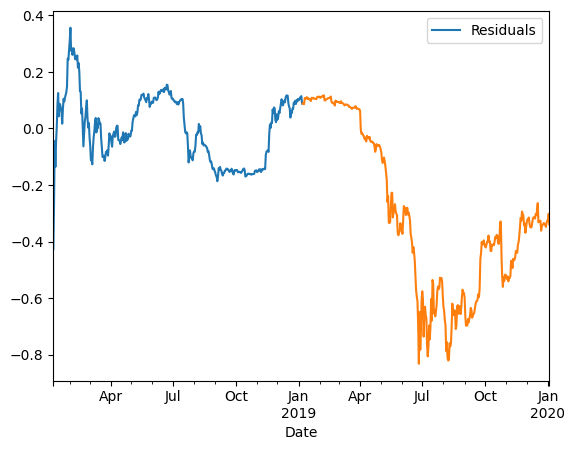

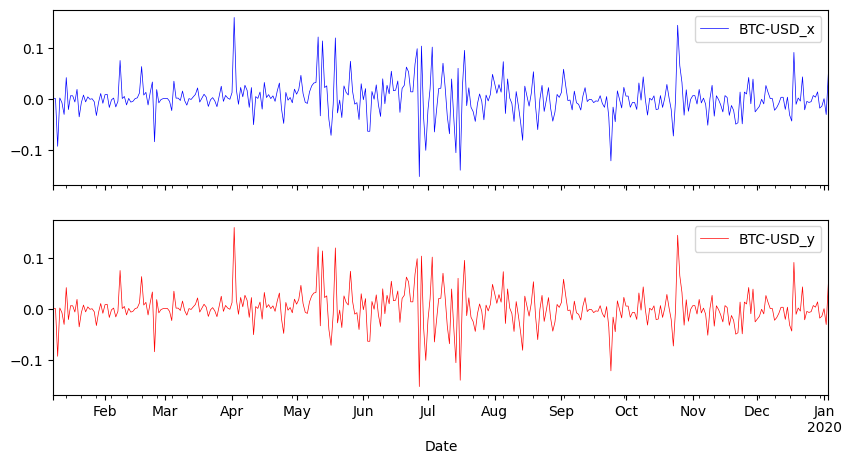

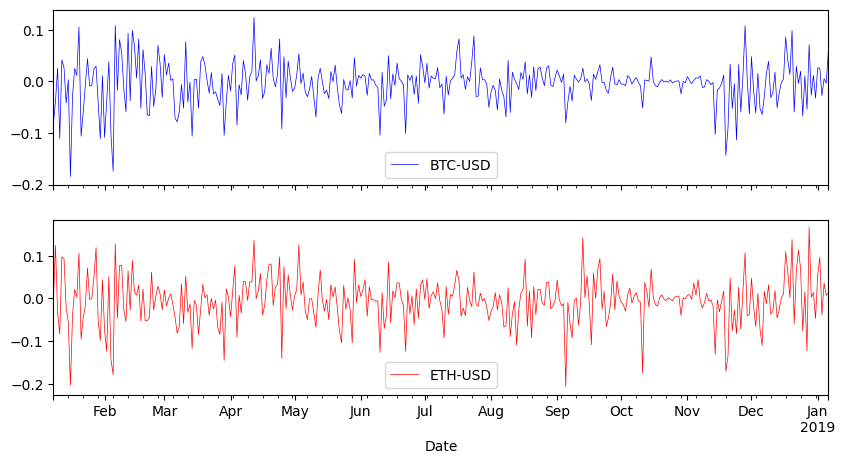

In [5]:
x_train, y_train, x_test, y_test  = get_pivoted_test_train_data(tickData['BTC-USD'],tickData['ETH-USD'], lookback_period=365, end_look_back_date="2019-01-04")
pair = TradingPair(x_train, y_train, x_test, y_test)

pair.train_residuals.plot()
pair.test_residual_predict.plot()

merged_returns_test = pd.merge(pair.returns_test_x,pair.returns_test_x, on='Date', how='inner')
merged_returns_test.plot(figsize=(10,5), color=('b', 'r', 'g'), subplots=True, linewidth=0.5)


merged_returns_train = pd.merge(pair.returns_train_x,pair.returns_train_y, on='Date', how='inner')
merged_returns_train.plot(figsize=(10,5), color=('b', 'r', 'g'), subplots=True, linewidth=0.5)

In [4]:
# Assuming df is your DataFrame and it has a DateTimeIndex


    # def __init__(self,
    #              x_train, y_train,
    #              x_test, y_test):
    #     self.x_train = x_train
    #     self.y_train = y_train
    #     self.x_test = x_test
    #     self.y_test = y_test
     
pair_ = None

for i, train_x, train_y, test_x, test_y in generate_train_test_sets(tickData['BTC-USD'],tickData['ETH-USD']):
    pair_ = TradingPair(train_x, train_y, test_x, test_y)



    print(pair_.__repr__)


    # pair.__repr__


# pair_ = None

# for i, train_x, train_y, test_x, test_y in generate_train_test_sets(tickData['BTC-USD'],tickData['ETH-USD']):
#     pair_ = TradingPair(train_x, train_y, test_x, test_y)
#     print(pair_.__repr__)


    # print('Period ', i, 'train x start date', train_x.index.min(), 'train x end date', train_x.index.max())
    # # print('Period ', i, 'train y start date', train_y.index.min(), 'train y end date', train_y.index.max())
    # print('Period ', i, 'test x start date', test_x.index.min(), 'tes x end date', test_x.index.max())


# # Iterate over each train-test period
# for period, (train_x, train_y, test_x, test_y) in enumerate(pair.X,pair.Y):
#     print()


# periods_data = generate_train_test_sets(pair.X,pair.Y)


# one = periods_data.get(1)

# # Iterate through each period
# for period, (train_x, train_y, test_x, test_y) in enumerate(periods_data, start=1):
#     # Extract the train and test sets for the current period
#     train_x, train_y = data['train_x'], data['train_y']
#     test_x, test_y = data['test_x'], data['test_y']
#     print(f"Processing period {period}")
    

NameError: name 'generate_train_test_sets' is not defined

In [58]:
periods_data.__repr__

<method-wrapper '__repr__' of generator object at 0x17851bd60>

SyntaxError: invalid syntax (1209101337.py, line 1)

In [19]:

for i, train_x, train_y, test_x, test_y in generate_train_test_sets(tickData['BTC-USD'],tickData['ETH-USD']):
    # pair = TradingPair(train_x, train_y, test_x, test_y)
    print(i)
    pair = TradingPair(train_x, train_y, test_x, test_y)

0


AttributeError: 'Series' object has no attribute 'range'